## B. Computational Problems

### Problem B.1

Let $X_1,...,X_{n_1}$ be an iid sample from population #1, with unknown mean $\mu_1$ and known standard deviation $\sigma_1$, and let $Y_1,...,Y_{n_2}$ be an iid sample from population #2, with unknown mean $\mu_2$ and known standard deviation $\sigma_2$. Suppose we want to conduct a hypothesis test of the sort: $$H_0: \mu_1 - \mu_2 = 0 \,\,\, vs \,\,\, H_1: \mu_1 - \mu_2 \ge 0. $$

The following algorithm has been suggested for a bootstrap test.

1. Calculate the test statistic $$t = \frac{\bar{x} - \bar{y}}{\sqrt{\sigma^2_1\big/n_1 + \sigma^2_2\big/n_2}}$$
 
2. Let $\bar{z}$ be the mean of the combined data sets. Create two new data sets, $x^\prime_1,...,x^\prime_{n_1}$ and $y^\prime_1,...,y^\prime_{n_2}$ that are the original data sets centered at $\bar{z}$.

3. Draw $B$ random bootstrap samples of size $n_1$ from $x^\prime_1,...,x^\prime_{n_1}$ and of size $n_2$ from $y^\prime_1,...,y^\prime_{n_2}$. The result will be two matrices, $x^*$ and $y^*$; $x^*$ will containin columns of bootstrap samples from sample #1, and $y^*$ will contain columns of bootstrap samples from sample #2.

4. Then, for each bootstrap sample pair, calculate 

$$t^* = \frac{\bar{x^*}_j - \bar{y^*}_j}{\sqrt{\sigma^{*^2}_1\big/n_1 + \sigma^{*^2}_2\big/n_2}},$$

where $\bar{x^*}_j$ is the sample mean of the $j^{th}$ bootstrap sample from sample #1, and $\bar{y^*}_j$ is the sample mean of the $j^{th}$ bootstrap sample from sample #2. $\sigma^{*^2}_1$ and $\sigma^{*^2}_2$ are the corresponding variance estimates of the $j^{th}$ bootstrap sample. $t^*$ will be a vector of length $B$ and will approximate the distribution of the test statistic $t$.

5. Estimate the p-value using $$\frac{\text{# of times }\{t^* \ge t \}}{B}.$$ 



#### (a) Generate $X_1,...,X_{20} \overset{iid}{\sim} N(0,2)$ and $Y_1,...,Y_{15} \overset{iid}{\sim} N(1,3)$, and then forget that you know $\mu_1 = 0$ and $\mu_2 = 1$. Use the bootstrap method described above to test $$H_0: \mu_1 - \mu_2 = 0 \,\,\, vs \,\,\, H_1: \mu_1 - \mu_2 \ge 0. $$

In [1]:
set.seed(1)
x = rnorm(20,0,sqrt(2))
y = rnorm(15,1,sqrt(3))

#Calculate the test statistic
xbar = mean(x)
ybar = mean(y)

#Calculate the denominator of the test statistic

td = sqrt((2/20) + (3/15)) 
t = (xbar - ybar)/td

#Combine the data set

z = c(x,y)
zbar = mean(z)

#Create new data sets centered around zbar

x.1 = x - xbar + zbar
y.1 = y - ybar + zbar

#Bootstrapping samples

b=200
xstar = replicate(b, sample(x.1, 20, replace = TRUE))



ystar = replicate(b, sample(y.1, 15, replace = TRUE))

xstarbar = colMeans(xstar)

ystarbar = colMeans(ystar)
xstarvar = NA

for (i in 1:200) {
    xstarvar[i] = var(xstar[,i])
}

ystarvar = NA

for (i in 1:200) {
    ystarvar[i] = var(ystar[,i])
}

#Calculate the test statistic for each bootstrap sample

tstarx = NA
tstary = NA
tstar = NA

for (i in 1:200) {
    tstarx[i] = mean(xstarbar[i])
}

for (i in 1:200) {
    tstary[i] = mean(ystarbar[i])
}

for (i in 1:200) {
    tstar[i] = (tstarx[i] - tstary[i]) / sqrt((xstarvar[i]/20) + (ystarvar[i]/15))
}

#Estimate the P-value

count =0
for (i in 1:200) {
    if (tstar[i] > t)
        count = count + 1
}

paste("The p value is", count/b)

[1] "The p value is 0.84"

#### (b) Use t.test() to test the hypotheses in part (a).

In [2]:
set.seed(1)

t.test(x,y,alternative="greater")


	Welch Two Sample t-test

data:  x and y
t = -1.1828, df = 26.172, p-value = 0.8762
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.466841       Inf
sample estimates:
mean of x mean of y 
0.2694414 0.8702078 


#### (c) How much do the answers from (a) and (b) differ? Explain the relationship between these tests.

#### I got a p-value of 0.852 in (a) and p-value in (b) is 0.8762. There is a difference of about -0.0242. This shows us that the alternative hypothesis is not acceptable and we fail to reject the null hypothesis which states that the difference between their means is greater than zero. Also to note, even though we took a 500 bootstrap sample of size 20 for x and 15 for y, we cannot conclusively find a strong p-value to reject the null hypothesis.

### Problem B.2

A tennis club has two systems to measure the speed of a tennis ball. The local tennis pros suspect one system, ${\tt speed1}$, is consistently recording faster speeds. To test her suspicions, she sets up both systems and records the speed of 12 serves (three serves from each side of the court). The values are stored in the data frame ${\tt TENNIS}$, with variables ${\tt speed1}$ and ${\tt speed2}$. The recorded speeds are in kilometers per hour. You can access ${\tt TENNIS}$ by installing the PASWR2 package (if you haven't dont so already: install.packages("PASWR2")) and running:

library(PASWR2)

data(TENNIS)


#### Does the evidence support the tennis pro's suspicion? Use the above bootstrap hypothesis testing procedure and $\alpha = 0.1$. 

In [3]:
set.seed(1)

#install.packages("PASWR2",dependencies = TRUE)
library(PASWR2)
data(TENNIS)

#Null: H1 - H2 = 0 & Alternative: H1 - H2 > 0. Note H1 is Speed1 and H2 is Speed2.
#Sample size is 12
#Alpha is 0.1
#Logical test statistic to use is mean Xbar for Speed 1 & Speed 2

summary(TENNIS)
ten <-TENNIS

x<-ten$speed1
y<-ten$speed2

xbar_1 = mean(x)
ybar_2 = mean(y)
n = nrow(ten)

var_x<-sd(x)^2
var_y<-sd(y)^2

#Calculate the test statistic

td.1 = sqrt((var_x/n) + (var_y/n)) 
t = (xbar_1 - ybar_2)/td.1
t

#Combine the data set

z = c(x,y)
zbar = mean(z)

#Create new data sets centered around zbar

x.1 = x - xbar_1 + zbar
y.1 = y - ybar_2 + zbar

#Bootstrapping samples

b=500
xstar = replicate(b, sample(x.1, n, replace = TRUE))
ystar = replicate(b, sample(y.1, n, replace = TRUE))

xstarbar = colMeans(xstar)
ystarbar = colMeans(ystar)
xstarvar = NA

for (i in 1:500) {
    xstarvar[i] = var(xstar[,i])
}

ystarvar = NA

for (i in 1:500) {
    ystarvar[i] = var(ystar[,i])
}


#Calculate the test statistic for each bootstrap sample

tstarx = NA
tstary = NA
tstar = NA

for (i in 1:500) {
    tstarx[i] = mean(xstarbar[i])
}

for (i in 1:500) {
    tstary[i] = mean(ystarbar[i])
}

for (i in 1:500) {
    tstar[i] = (tstarx[i] - tstary[i]) / sqrt((xstarvar[i]/n) + (ystarvar[i]/n))
}

#Estimate the P-value

count =0
for (i in 1:500) {
    if (tstar[i] > t)
        count = count + 1
}

paste("The p value is", count/b)

#Hypothesis test

t.test(x,y,alternative = "greater")


Warning message:
"package 'PASWR2' was built under R version 3.5.2"Loading required package: lattice
Loading required package: ggplot2


     speed1           speed2     
 Min.   : 56.45   Min.   :67.49  
 1st Qu.: 68.05   1st Qu.:74.84  
 Median : 75.62   Median :81.60  
 Mean   : 78.49   Mean   :79.81  
 3rd Qu.: 85.58   3rd Qu.:83.12  
 Max.   :105.68   Max.   :90.24  

[1] -0.2674647

[1] "The p value is 0.63"


	Welch Two Sample t-test

data:  x and y
t = -0.26746, df = 15.83, p-value = 0.6037
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -10.01106       Inf
sample estimates:
mean of x mean of y 
 78.48583  79.81500 


#### Since the computed P-value is 0.63 which is higher than the $\alpha = 0.10$ for rejection. We fail to reject the null hypothesis and conclude that there are no difference in the detection of ball speed by both machines. 

### Problem B.3
Let $X_1,...,X_{30} \overset{iid}{\sim}N(1,9)$. The formula for a 90% confidence interval for $\mu$ is 

$$\bar{X} \pm 1.64\frac{\sigma}{\sqrt{n}}.$$

Let's conduct a simulation to confirm the coverage of this confidence interval.

#### (a) Generate $m = 500$ random samples of size $n = 30$ from $N(1,9)$ and calculate the 90% confidence interval for each. Don't print anything.

In [4]:
set.seed(1)

m = 500
lb = NA
ub = NA
n = 30
for(i in 1:m){
    
 x<-rnorm(n=30,mean=1,sd=sqrt(9))
        xbar = mean(x)
         x_sd<-sqrt((n-1)/n)*sd(x)
         lb[i]<-xbar-1.64*(x_sd/sqrt(n))
         ub[i]<-xbar+1.64*(x_sd/sqrt(n)) 
}



#### (b) Estimate the coverage by finding the number of intervals that cover the true mean, and dividing my $m$.

In [5]:
count = 0

for (i in 1:500) {
    if (lb[i] <= 1 && 1 <= ub[i])
    count = count + 1
}

paste("The coverage is",count/500*100)


[1] "The coverage is 90.2"

### Problem B.4

Suppose that $X_1,...,X_8 \overset{iid}{\sim} Exp(\lambda)$. 


#### (a) Compute a $90\%$ pivot confidence interval for the population variance: $Var(X) = 1/\lambda^2 = \theta$.



In [6]:
set.seed(1)

x = rexp(8,1)

n=8

se =  sqrt((n-1)/n)*sd(x)

b = 500
bootstrap <-replicate(b,sample(x,8,replace=TRUE))

se1 = sqrt((n-1)/n)*apply(bootstrap,2,sd)

varbootstrap = se1^2

ub.1 <- quantile(varbootstrap,0.05)
lb.1 <- quantile(varbootstrap,0.95)

lb.pivot <- 2*(se^2) - lb.1
ub.pivot <- 2*(se^2) - ub.1

paste("The lower interval is ",lb.pivot)
paste("The upper interval is ",ub.pivot)

[1] "The lower interval is  0.199301805791633"

[1] "The upper interval is  1.3263728868269"

#### (b) Investigate the coverage of the bootstrap pivot confidence interval from part (a).

In [7]:
set.seed(1)

count = 0

for (i in 1:500) {
    x = rexp(n=8,1)
    n = 8
    se = sqrt((n-1)/n)*sd(x)
    b=500
    bootsample =  replicate(500, sample(x,8,replace = TRUE))

    se1 = sqrt((n-1)/n)*apply(bootsample,2,sd)
    
    var_bootsample<-se1^2
    u = 2*(se^2) - quantile(var_bootsample,0.05)
    l = 2*(se^2) - quantile(var_bootsample,0.95)

    if(1 >= l & 1 <= u) {
        count = count + 1
        }
    
        }
paste("The coverage is ",count/500)

[1] "The coverage is  0.47"

### Problem B.5

#### (a) Load the "gala" dataset, and describe the variables. 

In [8]:
#install.packages("faraway", dependencies = TRUE)
library(faraway)
data(gala)

summary(gala)

str(gala)


Attaching package: 'faraway'

The following object is masked from 'package:lattice':

    melanoma



    Species          Endemics          Area            Elevation      
 Min.   :  2.00   Min.   : 0.00   Min.   :   0.010   Min.   :  25.00  
 1st Qu.: 13.00   1st Qu.: 7.25   1st Qu.:   0.258   1st Qu.:  97.75  
 Median : 42.00   Median :18.00   Median :   2.590   Median : 192.00  
 Mean   : 85.23   Mean   :26.10   Mean   : 261.709   Mean   : 368.03  
 3rd Qu.: 96.00   3rd Qu.:32.25   3rd Qu.:  59.237   3rd Qu.: 435.25  
 Max.   :444.00   Max.   :95.00   Max.   :4669.320   Max.   :1707.00  
    Nearest          Scruz           Adjacent      
 Min.   : 0.20   Min.   :  0.00   Min.   :   0.03  
 1st Qu.: 0.80   1st Qu.: 11.03   1st Qu.:   0.52  
 Median : 3.05   Median : 46.65   Median :   2.59  
 Mean   :10.06   Mean   : 56.98   Mean   : 261.10  
 3rd Qu.:10.03   3rd Qu.: 81.08   3rd Qu.:  59.24  
 Max.   :47.40   Max.   :290.20   Max.   :4669.32  

'data.frame':	30 obs. of  7 variables:
 $ Species  : num  58 31 3 25 2 18 24 10 8 2 ...
 $ Endemics : num  23 21 3 9 1 11 0 7 4 2 ...
 $ Area     : num  25.09 1.24 0.21 0.1 0.05 ...
 $ Elevation: num  346 109 114 46 77 119 93 168 71 112 ...
 $ Nearest  : num  0.6 0.6 2.8 1.9 1.9 8 6 34.1 0.4 2.6 ...
 $ Scruz    : num  0.6 26.3 58.7 47.4 1.9 ...
 $ Adjacent : num  1.84 572.33 0.78 0.18 903.82 ...


#### There are 7 variables which include Species, Endemics, Area, Elevation, Nearest, Scruz, Adjacent.

#### Species
#### the number of plant species found on the island

#### Endemics
#### the number of endemic species

#### Area
#### the area of the island (km22)

#### Elevation
#### the highest elevation of the island (m)

#### Nearest
#### the distance from the nearest island (km)

#### Scruz
#### the distance from Santa Cruz island (km)

#### Adjacent
#### the area of the adjacent island (square km)


#### (b) Explore the relationship between the Species variable (response) and Endemics, Elevation, Nearest, and Adjacent (predictor variables). You might do so by creating four separate scatter plots (ideally, using ggplot()!). Do these relationships look linear? Does the variability in Species change as a function of any of the predictors? Are there any outliers in any of the plots?

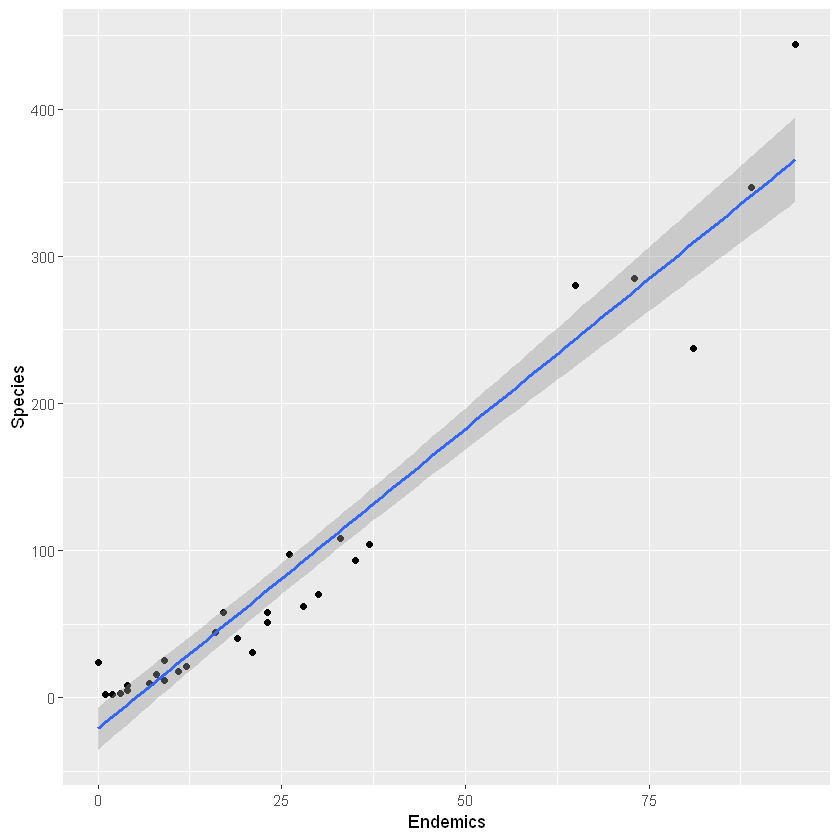

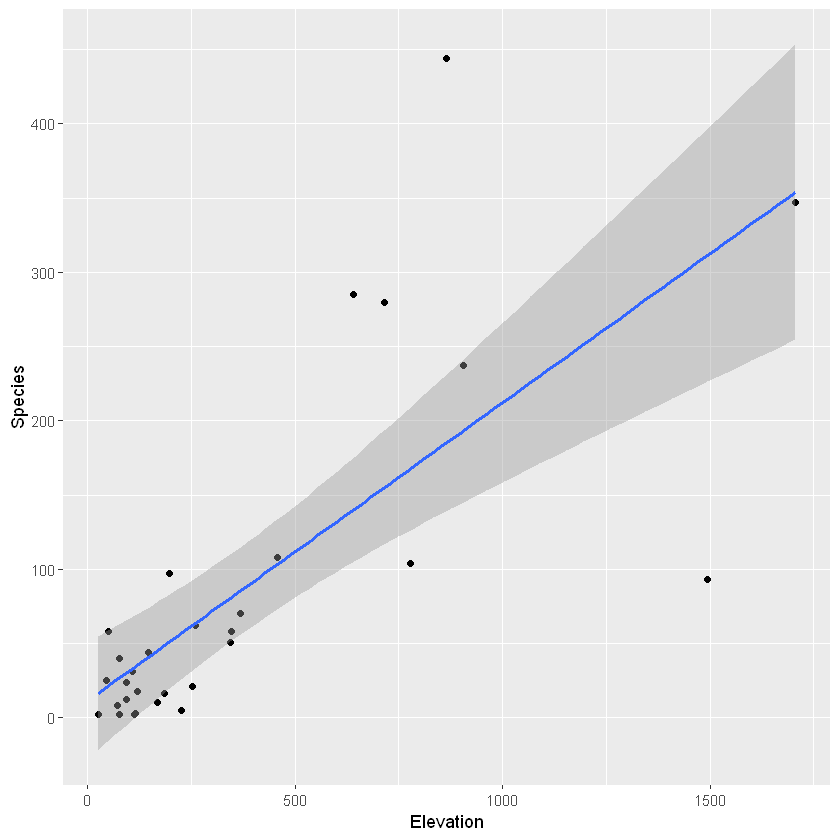

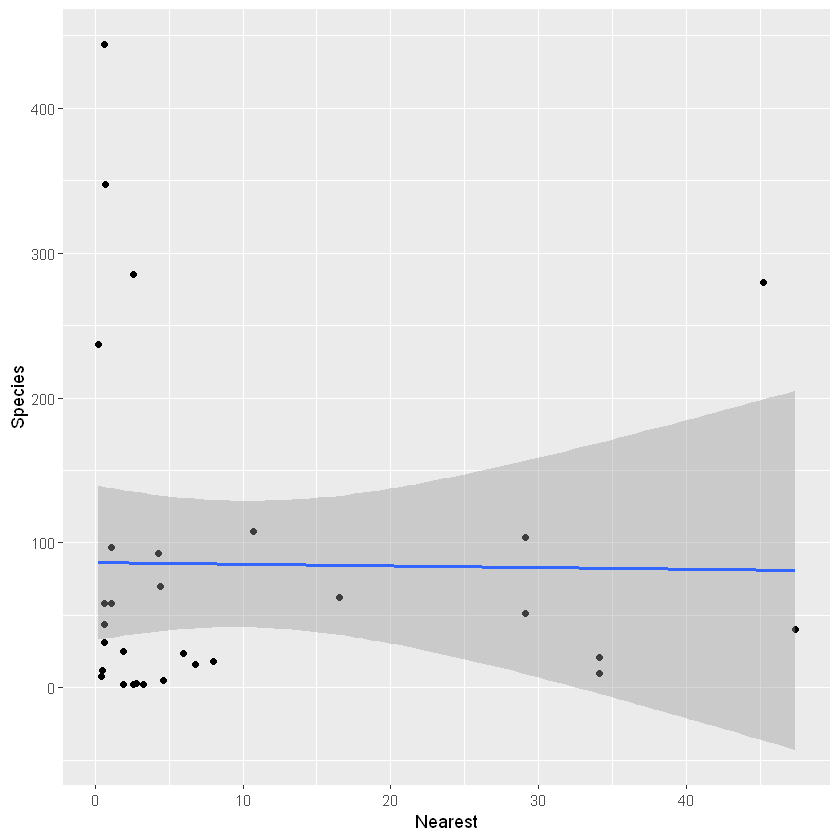

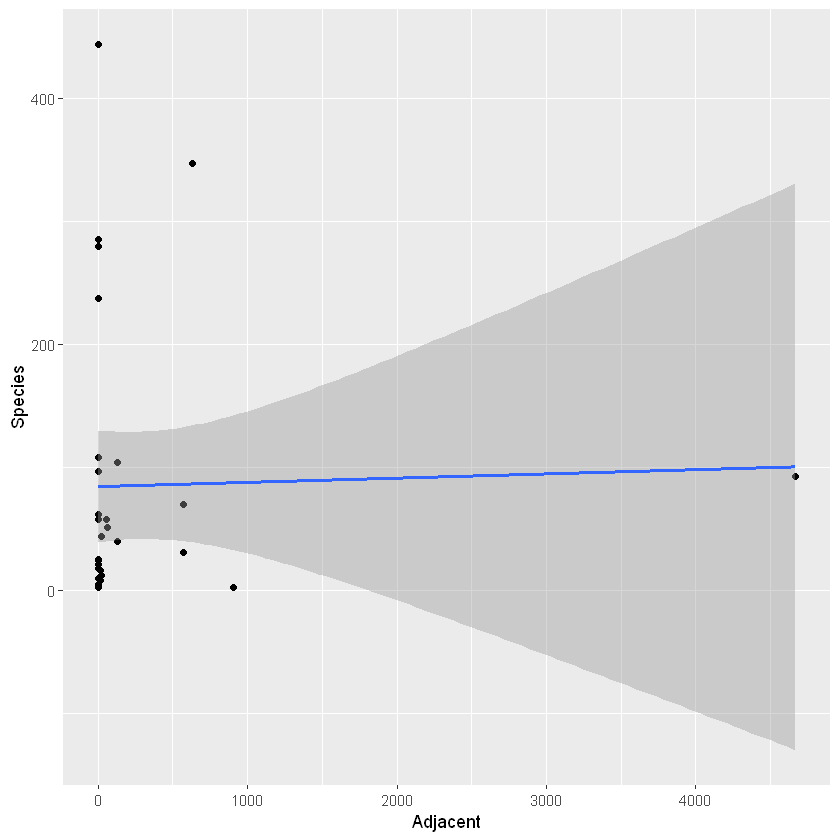

In [9]:
library(ggplot2)
#ggplot(data = nameofdata) + geom_point(mapping = aes(x = predictor, y = response))

ggplot(data = gala) + 
  geom_point(mapping = aes(x = Endemics, y = Species)) + geom_smooth(method=lm, mapping = aes(x = Endemics, y = Species), se=TRUE)

ggplot(data = gala) + 
  geom_point(mapping = aes(x = Elevation, y = Species)) + geom_smooth(method=lm, mapping = aes(x = Elevation, y = Species), se=TRUE)

ggplot(data = gala) + 
  geom_point(mapping = aes(x = Nearest, y = Species)) + geom_smooth(method=lm, mapping = aes(x = Nearest, y = Species), se=TRUE)

ggplot(data = gala) + 
  geom_point(mapping = aes(x = Adjacent, y = Species)) + geom_smooth(method=lm, mapping = aes(x = Adjacent, y = Species), se=TRUE)

#### Do these relationships look linear? Does the variability in Species change as a function of any of the predictors? Are there any outliers in any of the plots? 

##### Species (y) vs Endemics (x)
###### There is a positive linear relationship displayed. As the Endemics variable increase, generally species variable increase as well. Yes, the variability in species change as a function of Endemics predictor.. Yes, there are outliers in the plot. 

##### Species (y) vs Elevation (x)
###### There is a weak positive linear relationship displayed. As the Elevation variable increase, generally species variable increase as well. Yes, the variability in species change as a function of Elevation predictor. The variablity tends increase as the Elevation increase. Yes, there are outliers in the plot. 

##### Species (y) vs Nearest (x)
###### There is no linear relationship displayed. As the Nearest variable increase, there is not much change in the species variable. No, the variability in species does not change much. Most of the points are close to each other but some points are further away from the cluster of points in the above plot. Yes, there are outliers in the plot. 

##### Species (y) vs Adjacent (x)
###### There is no linear relationship displayed. As the Adjacent variable increase, there is generally no change in the species variable. No, the variability in species does not change much. In fact, most of the points are close to each other. Yes, there are outliers in the plot. 